In [1]:
!pip install lazypredict > None

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyRegressor

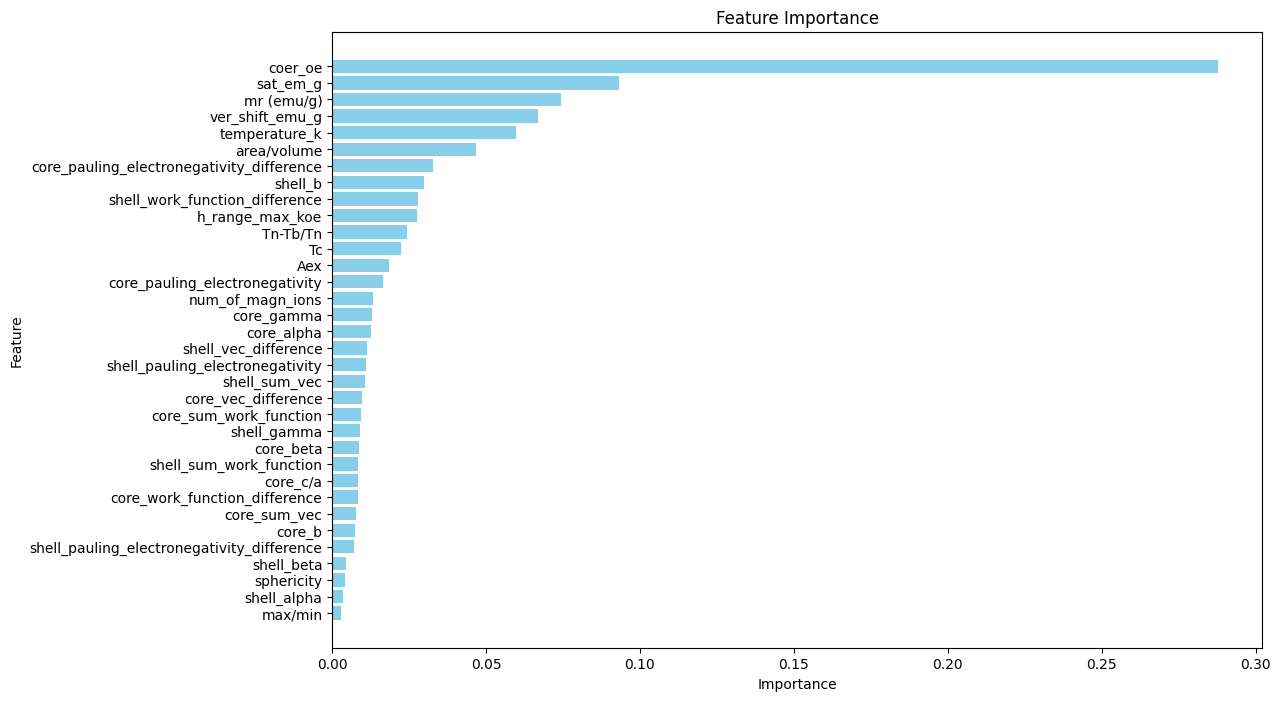

In [ ]:
# Загрузка данных
df = pd.read_csv('/content/bias_param_0507_OUT.csv')

# Удаление ненужных колонок
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'fc_field_t', 'exc_dir', 'ver_s_dir',])

# Разделение на признаки и целевую переменную
X = df.drop(columns=['exc_bias_oe'])
y = df['exc_bias_oe']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1984)

# Масштабирование данных
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели случайного леса
model = RandomForestRegressor(random_state=1984)
model.fit(X_train, y_train)

# Оценка важности признаков
importance = model.feature_importances_

# Создание DataFrame для визуализации
feature_importance_df = pd.DataFrame({
    'Feature': df.drop(columns=['exc_bias_oe']).columns,
    'Importance': importance
})

# Сортировка по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Самые важные признаки наверху
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

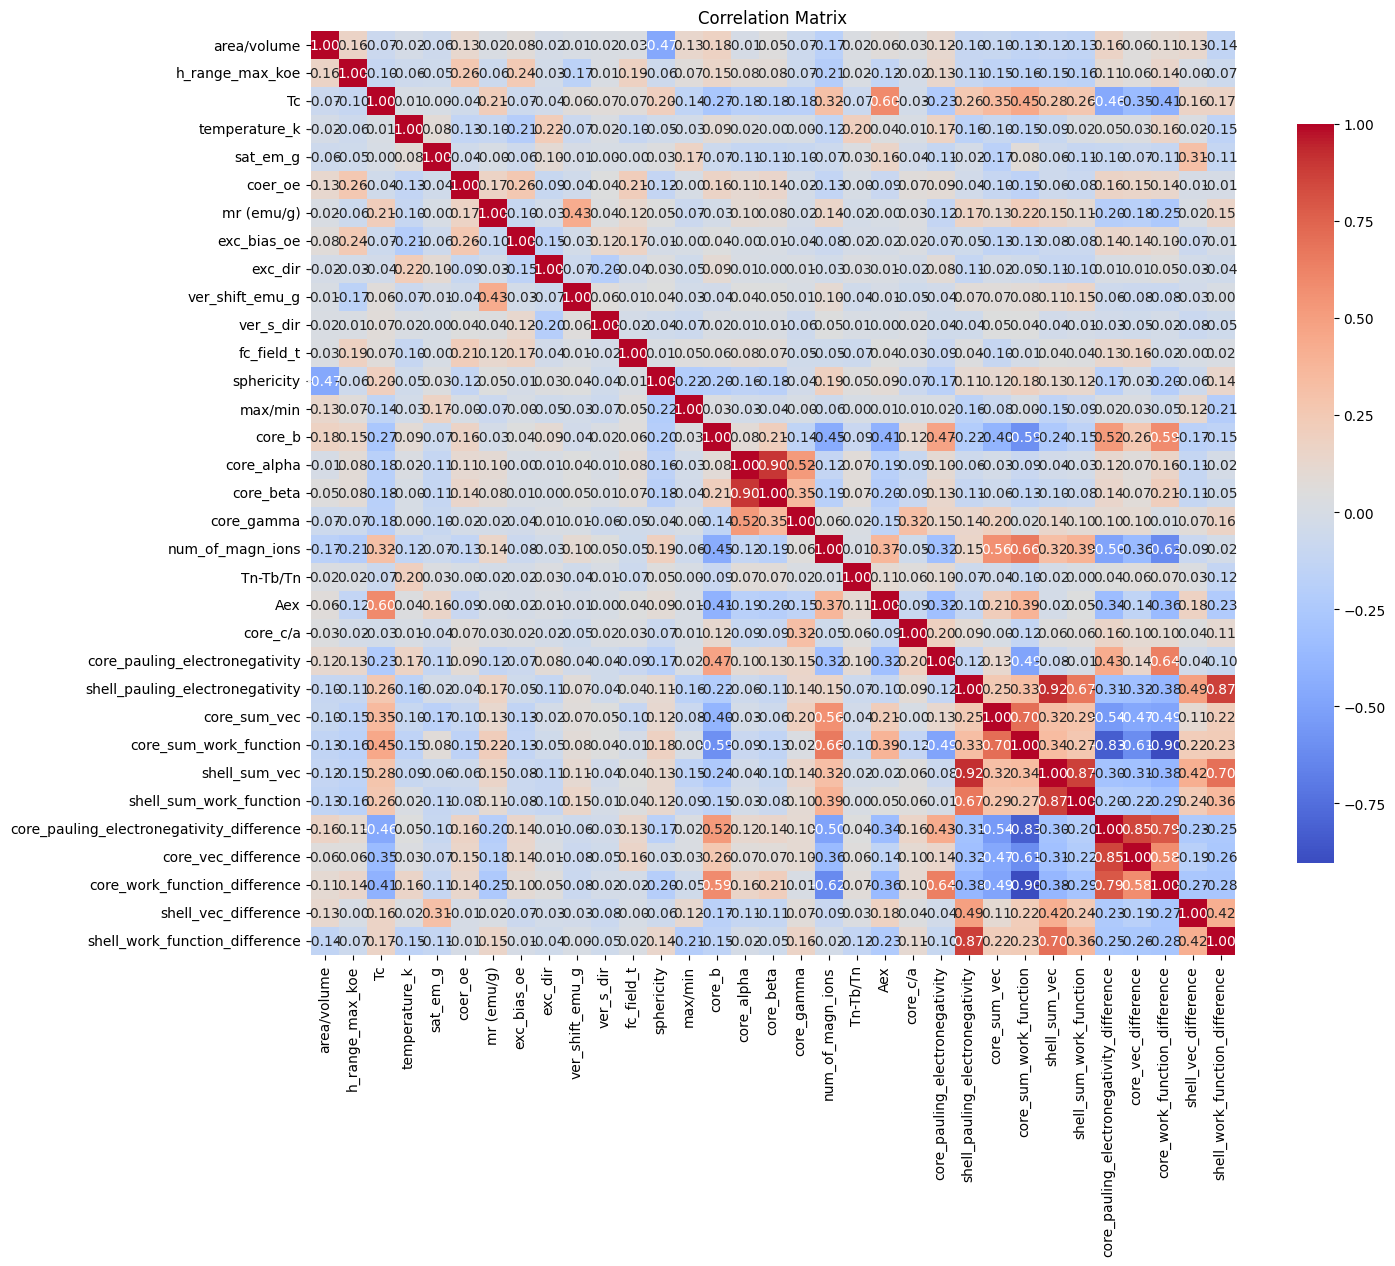

In [ ]:
# Загрузка данных
df = pd.read_csv('/content/bias_param_0507_OUT.csv')

# Удаление ненужных колонок
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'shell_pauling_electronegativity_difference', 'shell_b', 'shell_alpha',
       'shell_beta', 'shell_gamma',])

# Расчет матрицы корреляции
correlation_matrix = df.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.columns

Index(['area/volume', 'h_range_max_koe', 'Tc', 'temperature_k', 'sat_em_g',
       'coer_oe', 'mr (emu/g)', 'exc_bias_oe', 'exc_dir', 'ver_shift_emu_g',
       'ver_s_dir', 'fc_field_t', 'sphericity', 'max/min', 'core_b',
       'core_alpha', 'core_beta', 'core_gamma', 'shell_b', 'shell_alpha',
       'shell_beta', 'shell_gamma', 'num_of_magn_ions', 'Tn-Tb/Tn', 'Aex',
       'core_c/a', 'core_pauling_electronegativity',
       'shell_pauling_electronegativity', 'core_sum_vec',
       'core_sum_work_function', 'shell_sum_vec', 'shell_sum_work_function',
       'core_pauling_electronegativity_difference', 'core_vec_difference',
       'core_work_function_difference',
       'shell_pauling_electronegativity_difference', 'shell_vec_difference',
       'shell_work_function_difference'],
      dtype='object')

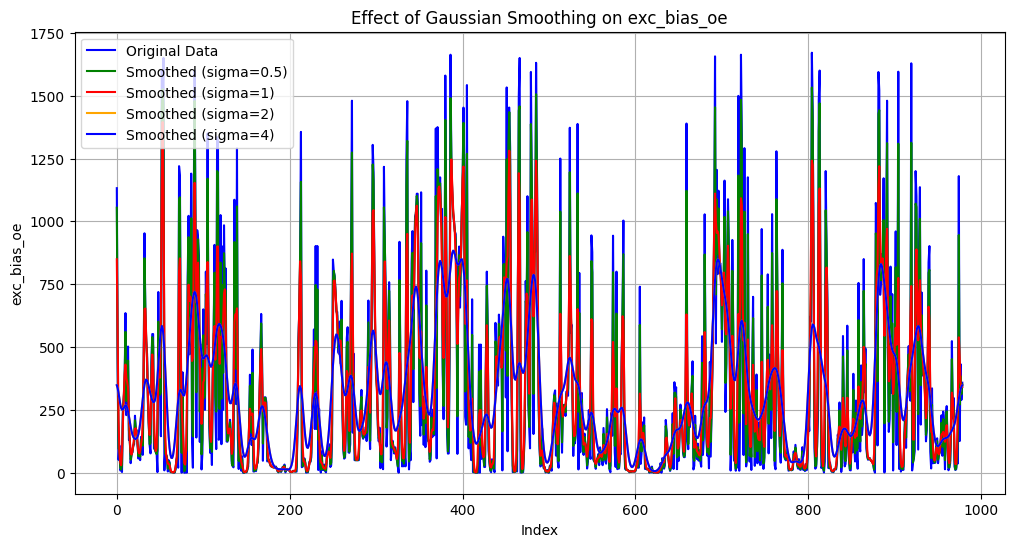

In [ ]:
# Загрузка данных
df = pd.read_csv('/content/bias_param_0507_OUT.csv')
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

# Извлечение столбца 'exc_bias_oe' и фильтрация только положительных значений
y = df['exc_bias_oe']
y = y[y > 0]

# Применение гауссового сглаживания с разными значениями sigma
y_smooth_1 = gaussian_filter1d(y, sigma=0.5)
y_smooth_3 = gaussian_filter1d(y, sigma=1)
y_smooth_2 = gaussian_filter1d(y, sigma=2)
y_smooth_2 = gaussian_filter1d(y, sigma=4)

# Визуализация данных
plt.figure(figsize=(12, 6))
plt.plot(y.values, label='Original Data', color='blue')
plt.plot(y_smooth_1, label='Smoothed (sigma=0.5)', color='green')
plt.plot(y_smooth_3, label='Smoothed (sigma=1)', color='red')
plt.plot(y_smooth_2, label='Smoothed (sigma=2)', color='orange')
plt.plot(y_smooth_2, label='Smoothed (sigma=4)', color='blue')

plt.title('Effect of Gaussian Smoothing on exc_bias_oe')
plt.xlabel('Index')
plt.ylabel('exc_bias_oe')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Data loaded successfully.
Data split into training and test sets.
X_train shape: (783, 36)
X_test shape: (196, 36)
y_train shape: (783,)
y_test shape: (196,)
Data scaled.
LazyRegressor created.


100%|██████████| 42/42 [00:18<00:00,  2.28it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2720
[LightGBM] [Info] Number of data points in the train set: 783, number of used features: 36
[LightGBM] [Info] Start training from score 3.111346
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

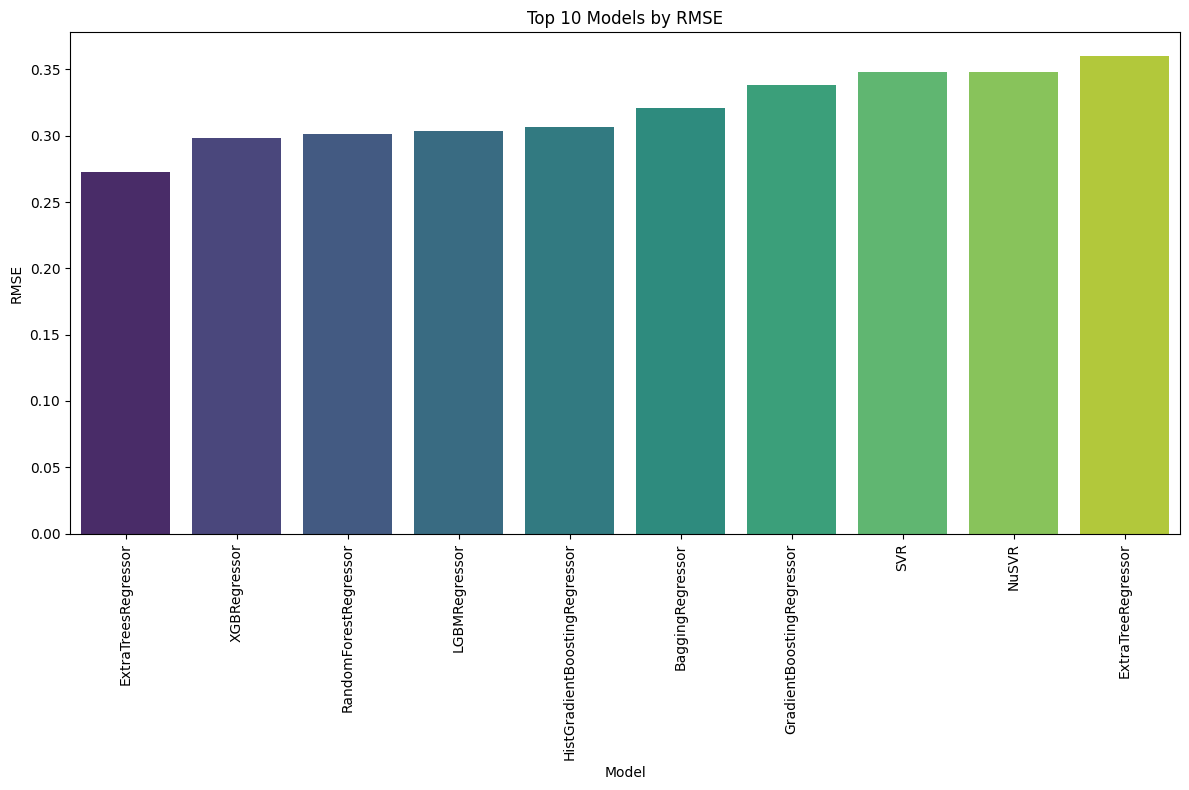

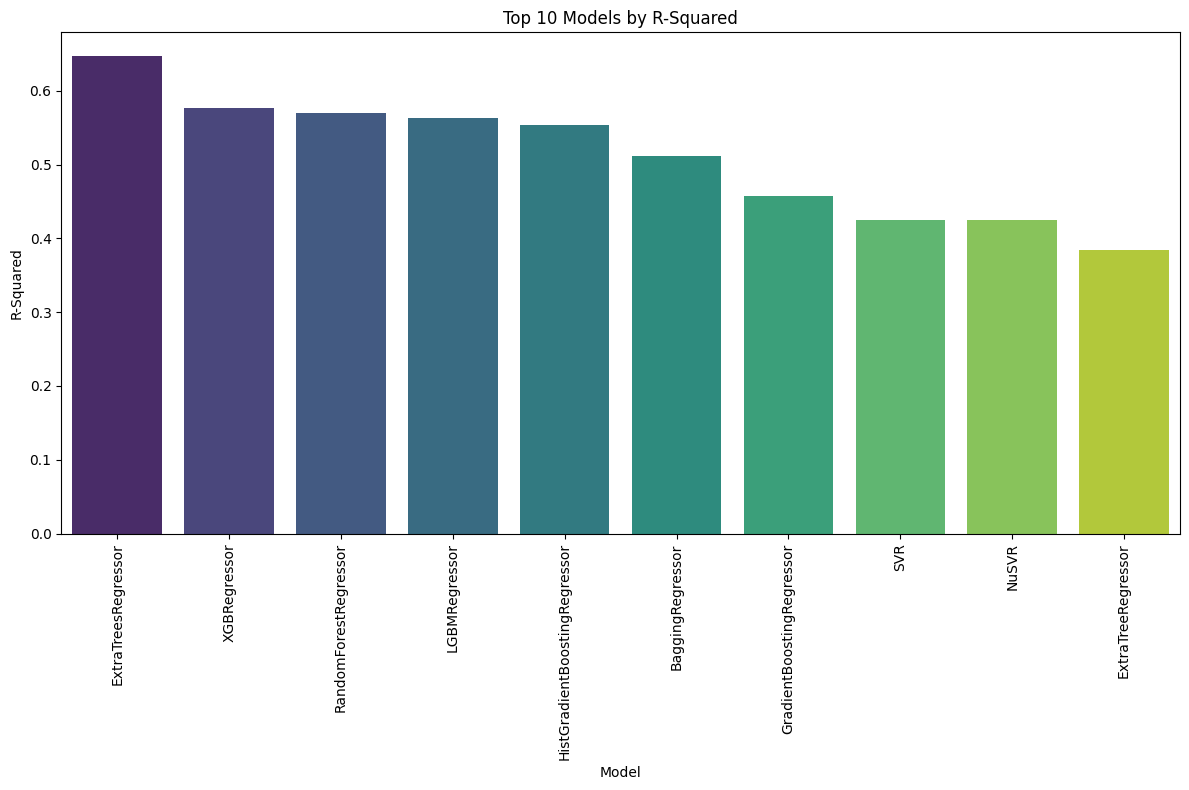

In [2]:
# Загрузка данных
df = pd.read_csv('/content/bias_param_0507_OUT.csv')
print("Data loaded successfully.")

# Удаление ненужных колонок
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'fc_field_t'])  #, 'exc_dir', 'ver_s_dir']) №'shell_b','shell_work_function_difference', 'shell_alpha', 'shell_beta', 'shell_gamma',

# Разделение на признаки и целевую переменную
X = df.drop(columns=['coer_oe']).values  # Признаки
y = df['coer_oe'].values  # Целевая переменная

# Сглаживание целевой переменной
y_smooth = gaussian_filter1d(y, sigma=2)  # Можно настроить sigma для изменения степени сглаживания

# Логарифмирование сглаженной целевой переменной
y_smooth_log = np.log10(y_smooth)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y_smooth_log, test_size=0.2, random_state=1984)
print("Data split into training and test sets.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Масштабирование данных
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Data scaled.")

# Создание LazyRegressor
reg = LazyRegressor(predictions=True)
print("LazyRegressor created.")

# Обучение и тестирование моделей
try:
    models, predictions = reg.fit(X_train, X_test, y_train, y_test)
    print("Model fitting complete.")
except Exception as e:
    print("Error during model fitting:", e)

# Проверка результатов
if not models.empty:
    print("Models found.")
    # Сохранение результатов в CSV
    models.to_csv('lazy_regressor_results.csv', index=True)
    print("Results saved to lazy_regressor_results.csv")

    # Загрузка результатов из CSV
    loaded_results = pd.read_csv('lazy_regressor_results.csv', index_col=0)
    print("Results loaded successfully from lazy_regressor_results.csv:")
    print(loaded_results)

    # Визуализация только 10 лучших моделей по RMSE
    plt.figure(figsize=(12, 8))
    top_10_rmse = models.sort_values(by='RMSE').head(10)
    sns.barplot(x=top_10_rmse.index, y='RMSE', data=top_10_rmse, palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Top 10 Models by RMSE')
    plt.ylabel('RMSE')
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()

    # Визуализация только 10 лучших моделей по R-Squared
    plt.figure(figsize=(12, 8))
    top_10_r2 = models.sort_values(by='R-Squared', ascending=False).head(10)
    sns.barplot(x=top_10_r2.index, y='R-Squared', data=top_10_r2, palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Top 10 Models by R-Squared')
    plt.ylabel('R-Squared')
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()
else:
    print("No models found.")

Data loaded successfully.
Data split into training and test sets.
X_train shape: (783, 29)
X_test shape: (196, 29)
y_train shape: (783,)
y_test shape: (196,)
Data scaled.
LazyRegressor created.


100%|██████████| 42/42 [00:08<00:00,  5.06it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2528
[LightGBM] [Info] Number of data points in the train set: 783, number of used features: 29
[LightGBM] [Info] Start training from score 2.002943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

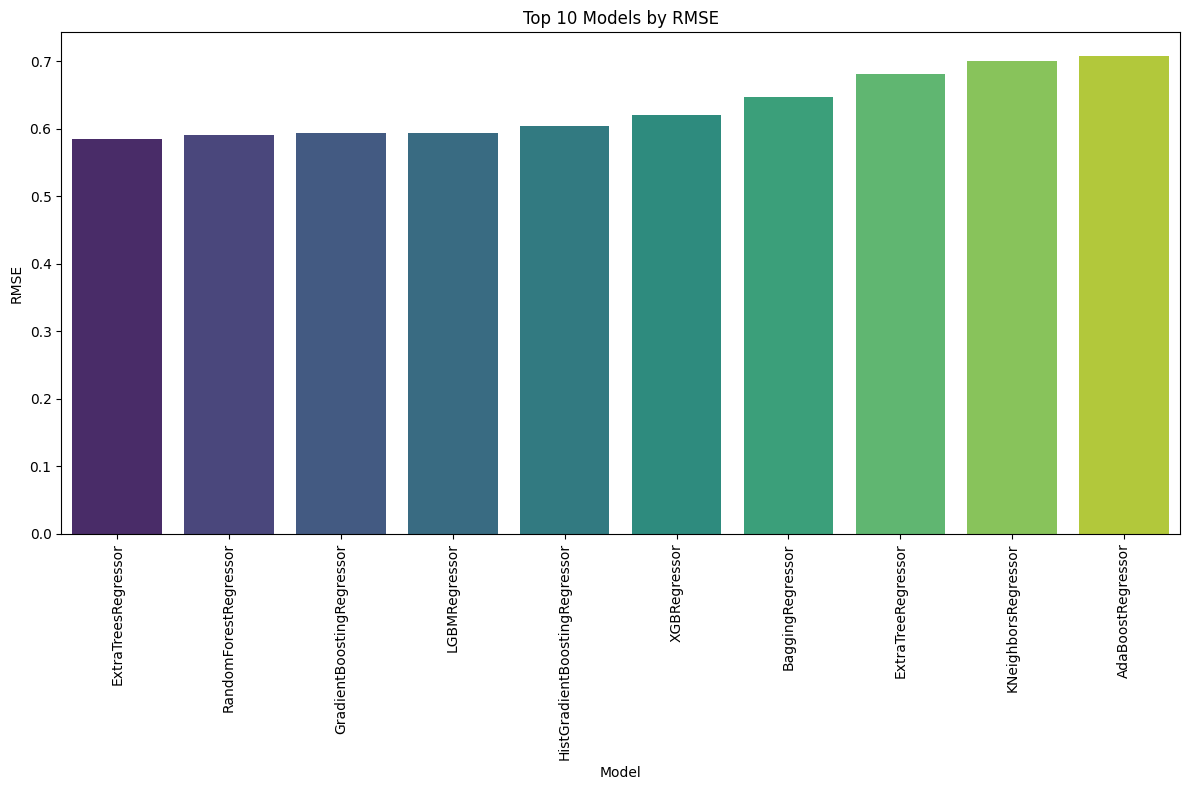

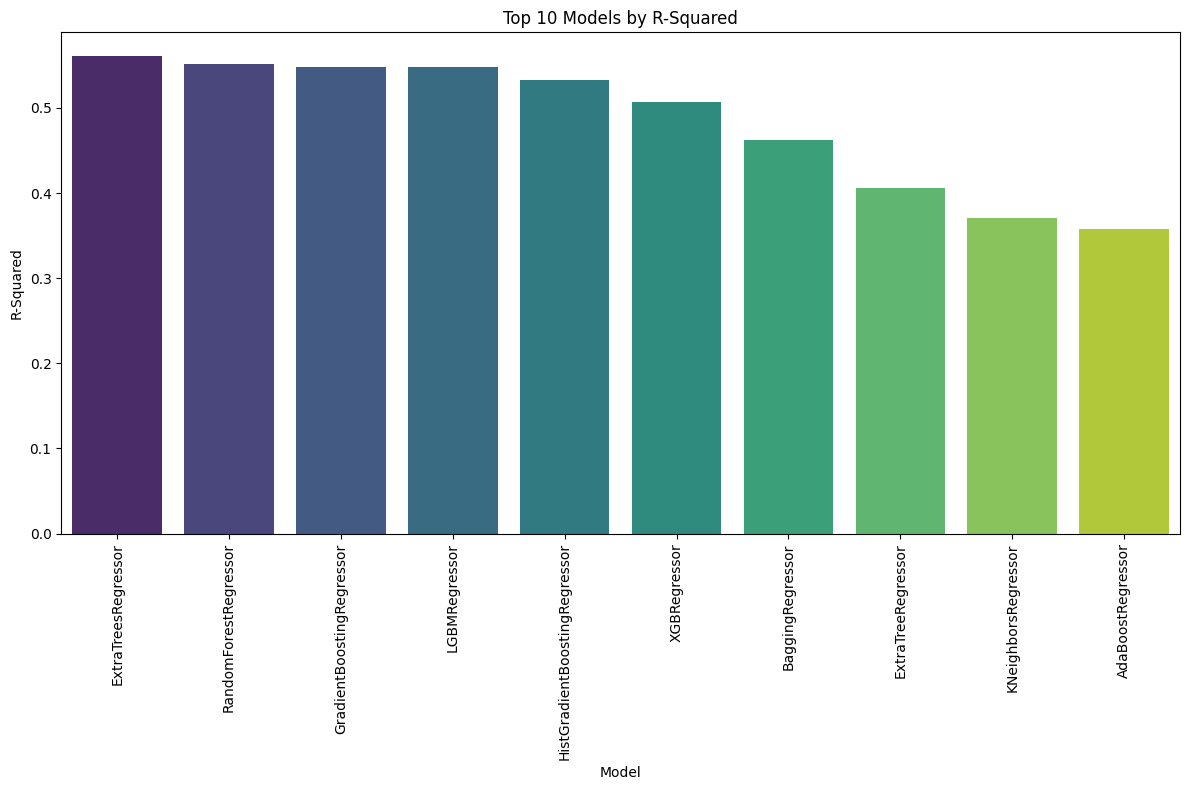

In [3]:
# Загрузка данных
df = pd.read_csv('/content/bias_param_0507_OUT.csv')
print("Data loaded successfully.")

# Удаление ненужных колонок
df = df.drop(columns=['shell_b', 'shell_work_function_difference', 'shell_alpha', 'shell_beta', 'shell_gamma','Unnamed: 0.1', 'Unnamed: 0', 'fc_field_t', 'exc_dir', 'ver_s_dir',])

# Разделение на признаки и целевую переменную
X = df.drop(columns=['exc_bias_oe']).values  # Признаки
y = df['exc_bias_oe'].values  # Целевая переменная
y = np.log10(y)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1984)
print("Data split into training and test sets.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Масштабирование данных
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Data scaled.")

# Создание LazyRegressor
reg = LazyRegressor(predictions=True)
print("LazyRegressor created.")

# Обучение и тестирование моделей
try:
    models, predictions = reg.fit(X_train, X_test, y_train, y_test)
    print("Model fitting complete.")
except Exception as e:
    print("Error during model fitting:", e)

# Проверка результатов
if not models.empty:
    print("Models found.")
    # Сохранение результатов в CSV
    models.to_csv('lazy_regressor_results.csv', index=True)
    print("Results saved to lazy_regressor_results.csv")

    # Загрузка результатов из CSV
    loaded_results = pd.read_csv('lazy_regressor_results.csv', index_col=0)
    print("Results loaded successfully from lazy_regressor_results.csv:")
    print(loaded_results)

    # Визуализация только 10 лучших моделей по RMSE
    plt.figure(figsize=(12, 8))
    top_10_rmse = models.sort_values(by='RMSE').head(10)
    sns.barplot(x=top_10_rmse.index, y='RMSE', data=top_10_rmse, palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Top 10 Models by RMSE')
    plt.ylabel('RMSE')
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()

    # Визуализация только 10 лучших моделей по R-Squared
    plt.figure(figsize=(12, 8))
    top_10_r2 = models.sort_values(by='R-Squared', ascending=False).head(10)
    sns.barplot(x=top_10_r2.index, y='R-Squared', data=top_10_r2, palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Top 10 Models by R-Squared')
    plt.ylabel('R-Squared')
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()
else:
    print("No models found.")